In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
from collections import Counter


In [2]:
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
stopwords_english = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/morbenari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/morbenari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/morbenari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('../data/Supplementary data - responses and measures.csv')
df

,Unnamed: 0,StudyNum,Condition,Response,EmpathyQ_1,cognitive,affective,motivational,general_empathy,PosRes,...,NegEmotions,PosEmotions,Authenticity_1,Deg_Helped_1,Deg_Could_help_1,Deg_Keep_con_1,Aided_by_1,Feel_aboutAI_1,Model,Respondent_Choice
0,1,1,AI,I'm so sorry to hear about the distressing tim...,9.0,5.0,4.6,4.6,4.733333,78.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,AI,I'm so sorry to hear about your mum's accident...,9.0,6.2,4.4,4.6,5.066667,74.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,AI,I'm really sorry to hear about the immense str...,6.0,4.2,1.8,3.0,3.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,AI,I'm really sorry that you're having to experie...,9.0,4.0,3.2,3.4,3.533333,71.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,AI,I'm truly sorry to hear about what happened to...,9.0,5.4,4.8,3.8,4.666667,90.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,3467,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Human
3467,3468,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,Human
3468,3469,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Human
3469,3470,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Human


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# Calculate some basic statistics for the data
df.describe()

,StudyNum,EmpathyQ_1,cognitive,affective,motivational,general_empathy,PosRes,Consent_for_use,NegEmotions,PosEmotions,Authenticity_1,Deg_Helped_1,Deg_Could_help_1,Deg_Keep_con_1,Aided_by_1,Feel_aboutAI_1,Model
count,3471.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,3469.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1770.000000,2746.000000,1178.000000
mean,2.832325,7.768029,6.769952,5.986458,6.268510,6.341640,68.464076,3.412799,0.565217,6.401045,6.487295,5.649915,5.808583,5.705816,5.216384,5.996358,1.999151
std,1.296016,1.716907,1.905041,2.097507,1.847652,1.824405,24.690507,0.929286,1.049709,2.087591,2.456683,2.650333,2.642130,2.691242,3.285211,1.849133,0.814586
min,1.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,7.000000,5.200000,4.500000,4.800000,4.933333,56.666667,3.000000,0.000000,5.500000,5.000000,4.000000,4.000000,4.000000,2.000000,5.000000,1.000000
50%,3.000000,8.000000,7.000000,6.000000,6.250000,6.416667,73.333333,4.000000,0.000000,6.750000,7.000000,6.000000,6.000000,6.000000,5.000000,6.000000,2.000000
75%,4.000000,9.000000,8.500000,7.750000,7.750000,7.916667,86.750000,4.000000,0.750000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,7.000000,3.000000
max,5.000000,9.000000,9.250000,9.250000,9.250000,9.250000,100.000000,4.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000,3.000000


In [6]:
## Check min and max of specific features

In [7]:
print(f"cognitive min: {df['cognitive'].min()}")
print(f"cognitive max: {df['cognitive'].max()}")

print(f"affective min: {df['affective'].min()}")
print(f"affective max: {df['affective'].max()}")

print(f"motivational min: {df['motivational'].min()}")
print(f"motivational max: {df['motivational'].max()}")


cognitive min: 0.25
cognitive max: 9.25
affective min: 0.0
affective max: 9.25
motivational min: 0.25
motivational max: 9.25


In [8]:
# check for null values
df.isnull().sum()

StudyNum                0
Condition             975
Response              383
EmpathyQ_1            975
cognitive             975
affective             975
motivational          975
general_empathy       975
PosRes                975
Consent_for_use         2
NegEmotions          1700
PosEmotions          1700
Authenticity_1       1700
Deg_Helped_1         1700
Deg_Could_help_1     1700
Deg_Keep_con_1       1700
Aided_by_1           1701
Feel_aboutAI_1        725
Model                2293
Respondent_Choice    2496
dtype: int64

In [9]:
df[df['EmpathyQ_1'].isnull()]

,StudyNum,Condition,Response,EmpathyQ_1,cognitive,affective,motivational,general_empathy,PosRes,Consent_for_use,NegEmotions,PosEmotions,Authenticity_1,Deg_Helped_1,Deg_Could_help_1,Deg_Keep_con_1,Aided_by_1,Feel_aboutAI_1,Model,Respondent_Choice
2496,4,NaN,Your wedding sounds like it was truly magnific...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,AI
2497,4,NaN,I'm really sorry to hear about your father's i...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,AI
2498,4,NaN,I'm really sorry to hear about your dad being ...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,AI
2499,4,NaN,I'm really sorry to hear about your unpleasant...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,AI
2500,4,NaN,I'm really sorry to hear about this situation ...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Human
3467,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,Human
3468,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Human
3469,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Human


In [10]:
np.unique(df[df['EmpathyQ_1'].isnull()]['StudyNum'])

array([4, 5])

In studies 4-5 there is no EmpathyQ_1. It is null.

In [11]:
df[df['motivational'] > 9]

,StudyNum,Condition,Response,EmpathyQ_1,cognitive,affective,motivational,general_empathy,PosRes,Consent_for_use,NegEmotions,PosEmotions,Authenticity_1,Deg_Helped_1,Deg_Could_help_1,Deg_Keep_con_1,Aided_by_1,Feel_aboutAI_1,Model,Respondent_Choice
726,2,1,I'm so sorry for your loss. It sounds like she...,9.0,9.25,8.75,9.25,9.083333,70.000000,3.0,0.00,8.25,9.0,7.0,7.0,7.0,1.0,5.0,NaN,NaN
732,2,1,I'm so sorry for your loss. I can only imagine...,9.0,8.25,6.50,9.25,8.000000,53.333333,4.0,0.00,6.75,8.0,8.0,7.0,6.0,1.0,5.0,NaN,NaN
761,2,1,It must be so gratifying to see your son truly...,9.0,9.25,9.25,9.25,9.250000,100.000000,4.0,0.00,8.50,9.0,9.0,9.0,9.0,1.0,9.0,NaN,NaN
775,2,1,I'm truly sorry to hear about your football te...,9.0,8.75,8.75,9.25,8.916667,100.000000,4.0,0.25,8.25,8.0,8.0,8.0,8.0,3.0,6.0,NaN,NaN
794,2,1,I'm overjoyed to hear that despite the emotion...,9.0,9.25,9.00,9.25,9.166667,86.333333,4.0,0.00,5.75,9.0,9.0,9.0,9.0,1.0,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,3,2,I am genuinely moved by your dedication and pa...,9.0,9.25,7.00,9.25,8.500000,100.000000,4.0,0.00,9.00,8.0,9.0,9.0,9.0,8.0,7.0,3.0,NaN
2462,3,2,I'm really sorry to hear that you're going thr...,9.0,9.25,6.25,9.25,8.250000,65.333333,1.0,0.00,6.50,9.0,6.0,9.0,7.0,10.0,5.0,3.0,NaN
2481,3,2,I can hear how tough your New Year's experienc...,9.0,8.25,8.25,9.25,8.583333,98.666667,4.0,0.00,9.00,9.0,7.0,7.0,5.0,5.0,7.0,1.0,NaN
2484,3,2,I'm truly sorry to hear that you've been battl...,9.0,8.50,8.25,9.25,8.666667,100.000000,2.0,0.00,8.50,9.0,9.0,9.0,7.0,6.0,1.0,3.0,NaN


Although motivational should be an average of components that are smaller or equal to 9, some values are bigger than 9. 

Conditon '1' corresponds to perceived Human responses and Condition '2' correspondes to perceived AI responses. 

# WordCloud

In [12]:
def setup_text(text: str, stopwords: list[str]):
  tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
  lemmatizer = nltk.stem.WordNetLemmatizer()
  stemmer = nltk.stem.PorterStemmer()
  tokens = tokenizer.tokenize(text)
  lemmas = [lemmatizer.lemmatize(t) for t in tokens if t not in stopwords]
  stems = [stemmer.stem(l) for l in lemmas]
  return stems


In [13]:
def create_wordcloud(df: pd.DataFrame, stopwords: list[str], title: str, ax=None):
    text = ' '.join(df.astype(str).tolist())
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    lemmatized_text_lst = setup_text(text, stopwords_english)
    text = ' '.join(lemmatized_text_lst)
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42, collocations=False).generate(text)

    if ax is None:
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, size=20)
        plt.show()
    else:
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(title, size=12)


In [14]:
def create_empathy_wordclouds_subplots(df: pd.DataFrame, stopwords: list[str]):
    unique_empathy_levels = df['EmpathyQ_1'].dropna().unique()
    unique_empathy_levels = sorted([int(level) for level in unique_empathy_levels if 0 <= level <= 9])
    
    n_cols = 5 
    n_rows = 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    axes = axes.flatten()
    fig.suptitle('Word Clouds by Empathy levels', fontsize=20, y=0.6)
        
    for i, empathy_level in enumerate(unique_empathy_levels):
        empathy_df = df[df['EmpathyQ_1'] == empathy_level]    
        create_wordcloud(
                empathy_df['Response'], 
                stopwords, 
                f'Empathy Level {empathy_level} \n (num of responses={len(empathy_df)})',
                ax=axes[i]
            )
    
    for j in range(len(unique_empathy_levels), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.7], h_pad=0.1, w_pad=0.8)
    plt.show()

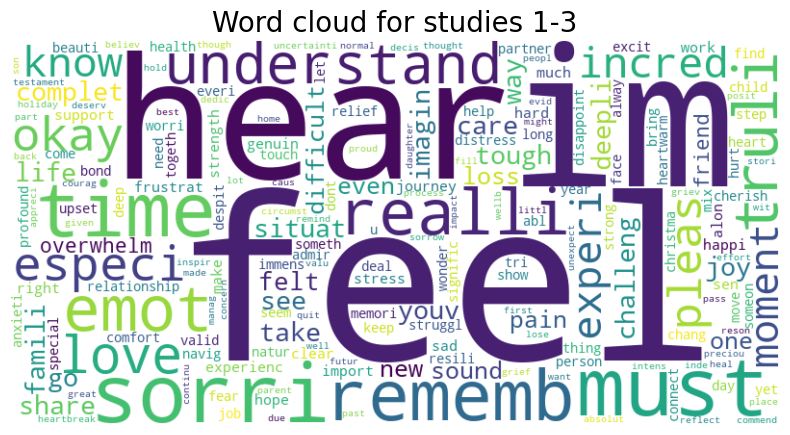

In [15]:
non_nan_response_df = df[~df['Response'].isnull()]
create_wordcloud(non_nan_response_df['Response'], stopwords_english, title="Word cloud for studies 1-3")

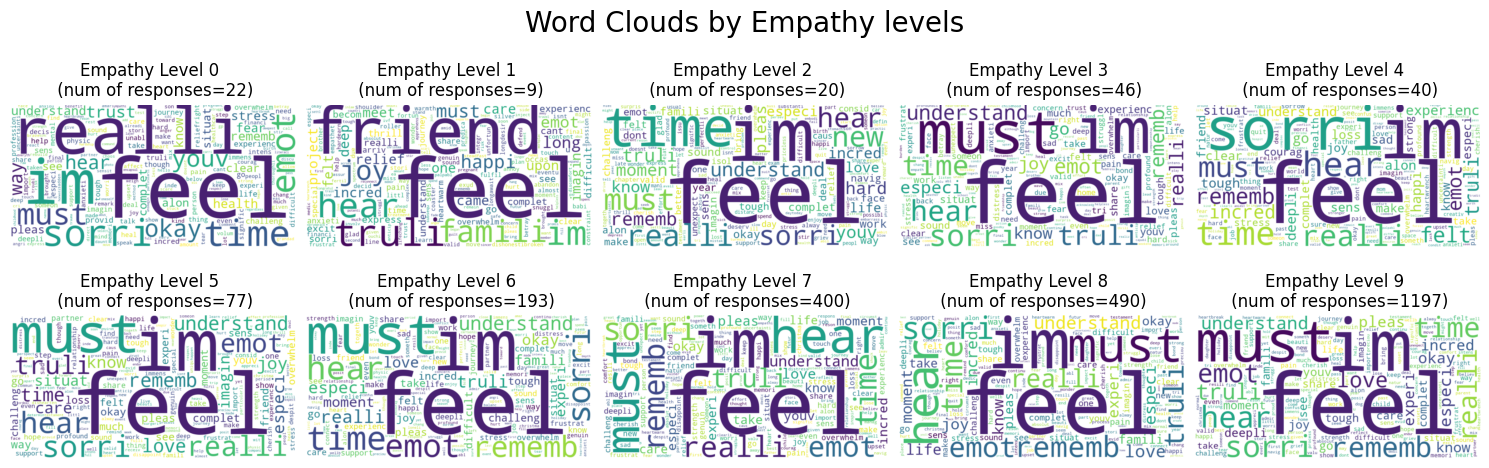

In [16]:
create_empathy_wordclouds_subplots(non_nan_response_df, stopwords_english)

# Distribution of labels

In [17]:
def plot_countplot(df: pd.DataFrame, title: str):
    sns.countplot(x ='EmpathyQ_1', data = df)
    plt.title(title)
    plt.show()


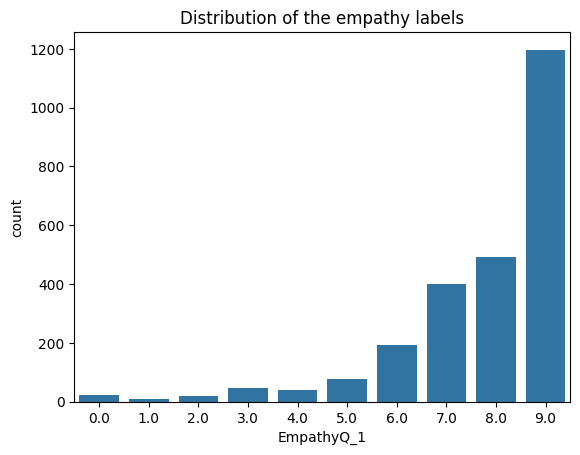

In [18]:
plot_countplot(df, title="Distribution of the empathy labels")

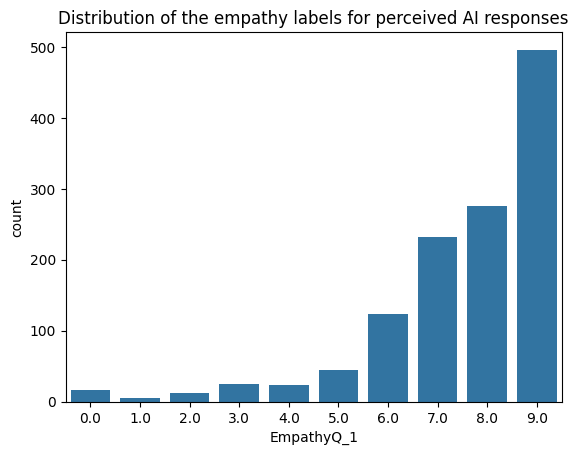

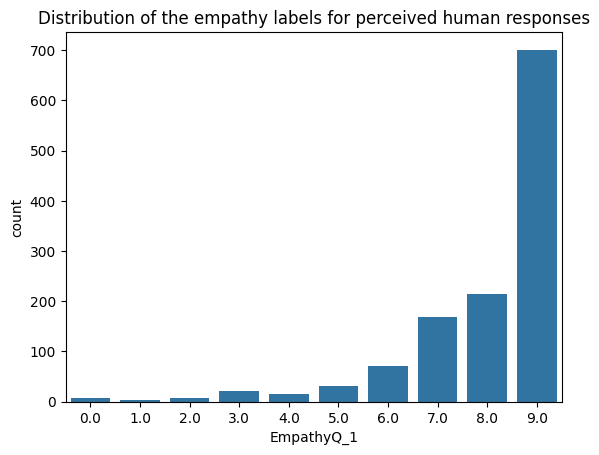

In [19]:
plot_countplot(df[df['Condition'].isin(["AI", "1"])], title="Distribution of the empathy labels for perceived AI responses")
plot_countplot(df[df['Condition'].isin(['Human', '2'])], title="Distribution of the empathy labels for perceived human responses")

In [20]:
df

,StudyNum,Condition,Response,EmpathyQ_1,cognitive,affective,motivational,general_empathy,PosRes,Consent_for_use,NegEmotions,PosEmotions,Authenticity_1,Deg_Helped_1,Deg_Could_help_1,Deg_Keep_con_1,Aided_by_1,Feel_aboutAI_1,Model,Respondent_Choice
0,1,AI,I'm so sorry to hear about the distressing tim...,9.0,5.0,4.6,4.6,4.733333,78.666667,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AI,I'm so sorry to hear about your mum's accident...,9.0,6.2,4.4,4.6,5.066667,74.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,AI,I'm really sorry to hear about the immense str...,6.0,4.2,1.8,3.0,3.000000,4.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,AI,I'm really sorry that you're having to experie...,9.0,4.0,3.2,3.4,3.533333,71.333333,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,AI,I'm truly sorry to hear about what happened to...,9.0,5.4,4.8,3.8,4.666667,90.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Human
3467,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,Human
3468,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Human
3469,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Human


# Most popular words

# Count the number of words

First, we wanted to count the frequency of words in the entire dataframe.
In order to do so, we tokenized the response column, lemmatized it (sound and sounds will be the same after lemmatizing) and finally, we filter the words. As a result, all the words that are in the english stopwords, are not in the result.
Lastly, we plot the most n common words.

In [21]:
def count_words_freq(text):
  if pd.isnull(text):
    return text
  text = setup_text(text, stopwords_english)
  return Counter(text)

In [22]:
def get_n_most_common_words(data: pd.DataFrame, n: int, plot: bool = True, title_prefix: str = ""):
    response = data['Response'].astype('str')
    all_text = ' '.join(response)
    all_text = all_text.lower()
    cnt_of_each_token = count_words_freq(all_text)
    n_most_common = cnt_of_each_token.most_common(n)
    if plot:
        n_most_common.sort(key=lambda x: x[1], reverse=True)
        words = [item[0] for item in n_most_common]
        counts = [item[1] for item in n_most_common]
        plt.bar(words, counts, width=0.5)
        plt.xlabel('Words')
        plt.xticks(rotation=45)
        plt.ylabel('Frequency')
        plt.title(f'{title_prefix} Word Frequency Bar Plot For n={n}')
        plt.show()
    else:
      return n_most_common



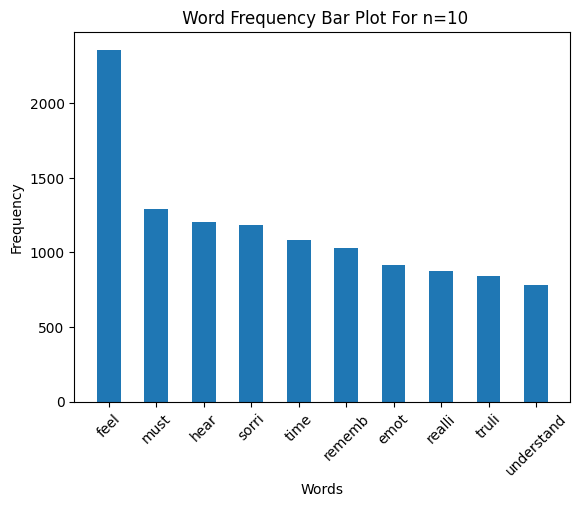

In [23]:
df['empathy_level'] = df['EmpathyQ_1'].apply(lambda x: 1 if x > 4 else 0)

get_n_most_common_words(df[df['empathy_level'] == 1], 10)

In [24]:
df['Response'] = df['Response'].astype('str') # Some rows are none, so convert all rows type to str
all_text = ' '.join(df['Response'])
all_text = all_text.lower()
cnt_of_each_token = count_words_freq(all_text)
n_most_common = cnt_of_each_token.most_common(10)


In this code, we assume that a word appears one time in each sentence (and not more). Hence, we count the number of appearences for each word.

In [25]:
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    return ' '.join(setup_text(text, stopwords_english))


In [26]:
high_empathy = ' '.join([preprocess_text(response) for response in df[df['empathy_level'] == 1]['Response']])
low_empathy = ' '.join([preprocess_text(response) for response in df[df['empathy_level'] == 0]['Response'].astype(str)])

word_counts = []

for i in range(len(n_most_common)):
  word = n_most_common[i][0]
  count = n_most_common[i][1]
  low_empathy_cnt = low_empathy.count(word)/count
  high_empathy_cnt = high_empathy.count(word)/count
  word_counts.append([word, low_empathy_cnt, high_empathy_cnt])


In [28]:
high_empathy_counts = count_words_freq(high_empathy)
low_empathy_counts = count_words_freq(low_empathy)

high_total_words = sum(high_empathy_counts.values())
low_total_words = sum(low_empathy_counts.values())
all_counts = high_empathy_counts + low_empathy_counts
n_most_common = all_counts.most_common(10)

word_counts = []
for word, _ in n_most_common:
    high_empathy_pct = (high_empathy_counts[word] / high_total_words)* 100 if high_total_words > 0 else 0
    low_empathy_pct = (low_empathy_counts[word] / low_total_words)* 100 if low_total_words > 0 else 0
    word_counts.append([word, high_empathy_pct, low_empathy_pct])

In [29]:
word_counts

[['feel', 2.934301487044313, 3.235971397406375],
 ['must', 1.6088924255234494, 1.5068880539732556],
 ['hear', 1.4945044014522306, 1.8624005171090374],
 ['sorri', 1.472124135873079, 1.8139215448632489],
 ['time', 1.3490326751877455, 1.4866884822041773],
 ['rememb', 1.2794051822748298, 1.4866884822041773],
 ['realli', 1.091659621027503, 1.426089766896942],
 ['emot', 1.1438802407121897, 1.1150163616531328],
 ['truli', 1.049385786044661, 1.0826970468226074],
 ['understand', 0.9760282488685532, 1.1028966185916858]]

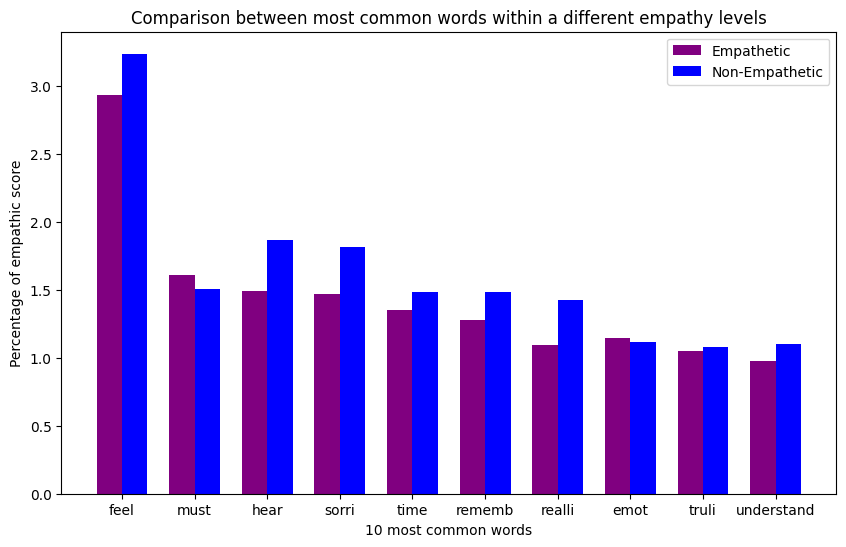

In [30]:
words = [item[0] for item in word_counts]
empathetic_counts = [item[1] for item in word_counts]
non_empathetic_counts = [item[2] for item in word_counts]

x = np.arange(len(words))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, empathetic_counts, width, label='Empathetic', color='purple')
plt.bar(x + width/2, non_empathetic_counts, width, label='Non-Empathetic', color='blue')

plt.xticks(x, words)
plt.xlabel("10 most common words")
plt.ylabel("Percentage of empathic score")
plt.legend()
plt.title("Comparison between most common words within a different empathy levels")


plt.show()

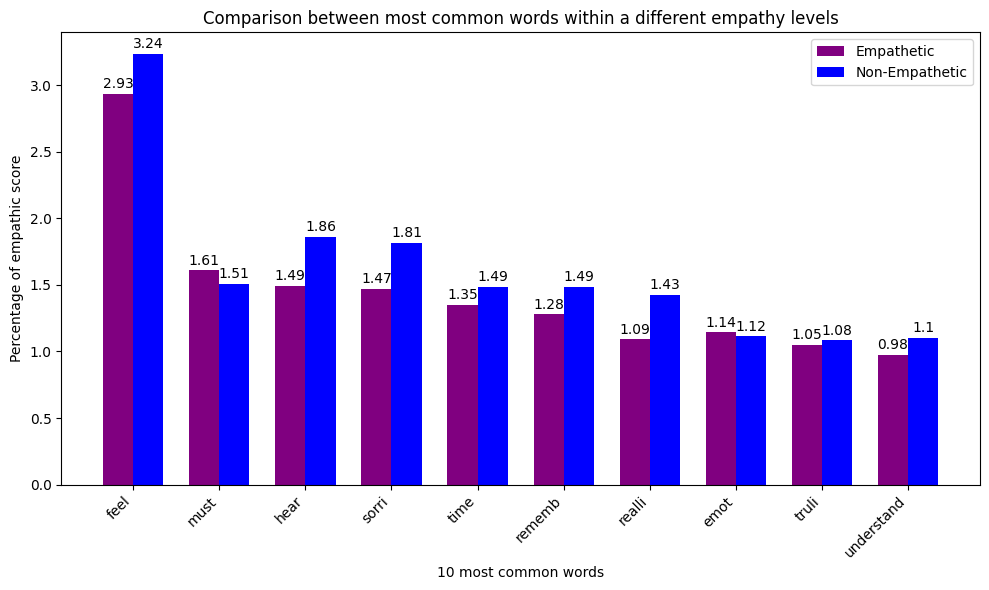

In [31]:
# visualize the bar plot with the values on top
words = [item[0] for item in word_counts]
empathetic_counts = [item[1] for item in word_counts]
non_empathetic_counts = [item[2] for item in word_counts]

x = np.arange(len(words))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, empathetic_counts, width, label='Empathetic', color='purple')
bars2 = plt.bar(x + width/2, non_empathetic_counts, width, label='Non-Empathetic', color='blue')

for i in range(len(x)):
    plt.text(
        x[i] - width/2,
        empathetic_counts[i] + 0.02,
        str(round(empathetic_counts[i], 2)),
        ha='center',
        va='bottom'
    )
    plt.text(
        x[i] + width/2,
        non_empathetic_counts[i] + 0.02,
        str(round(non_empathetic_counts[i], 2)),
        ha='center',
        va='bottom'
    )

plt.xticks(x, words, rotation=45, ha='right')
plt.xlabel("10 most common words")
plt.ylabel("Percentage of empathic score")
plt.legend()
plt.title("Comparison between most common words within a different empathy levels")
plt.tight_layout()
plt.show()


## Correlations

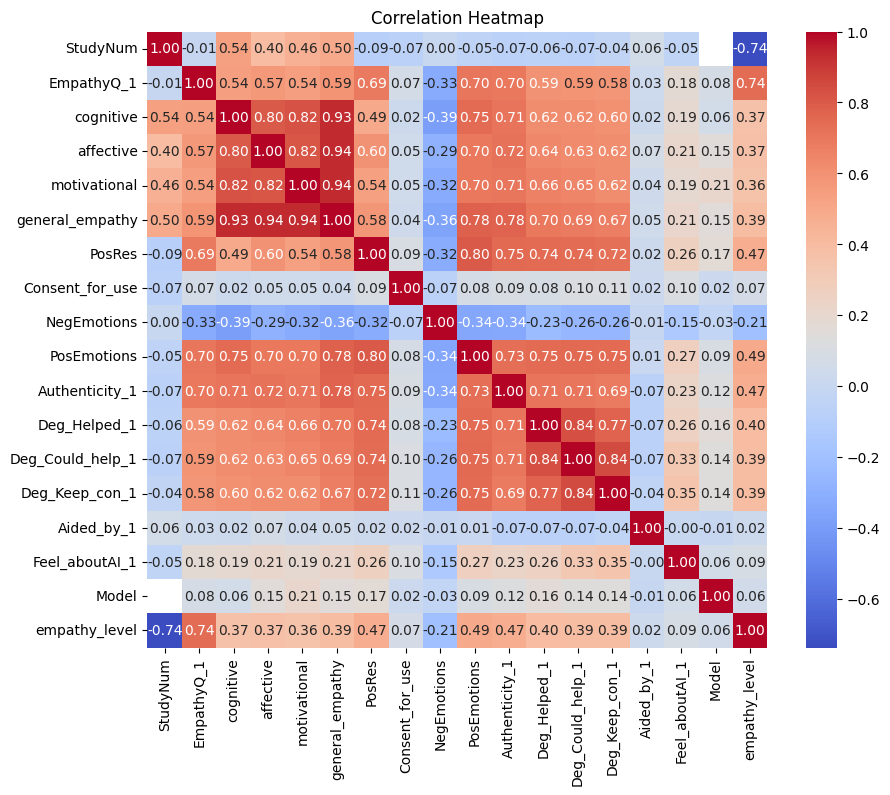

In [32]:
# Generate a correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


# Explore the 'model' column

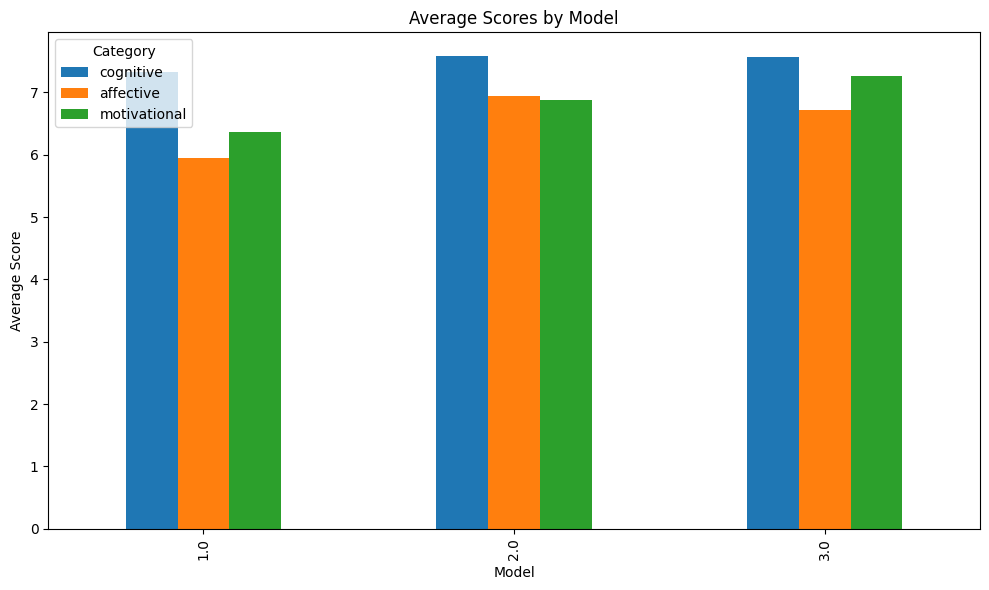

In [33]:
grouped = df.groupby("Model")[["cognitive", "affective", "motivational"]].mean()

# Create the bar plot
grouped.plot(kind="bar", figsize=(10, 6))
plt.title("Average Scores by Model")
plt.xlabel("Model")
plt.ylabel("Average Score")
plt.legend(title="Category")
plt.tight_layout()
plt.show()